In [99]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns  
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline  
plt.style.use('fivethirtyeight') 

In [100]:
# Load the dataset
file_path = './Lloyds_data.csv'
data = pd.read_csv(file_path)
data.shape

(105277, 10)

In [101]:
data.head()

,Unnamed: 0,individual_id,timestamp,date,day_of_week,hour_of_day,department,spend,at_risk_event,at_risk_behaviour_window
0,0,1,59:40.0,09/01/2023,Monday,11.994438,ops,2.10,False,NaN
1,1,1,10:02.9,11/01/2023,Wednesday,9.167461,ops,4.45,False,NaN
2,2,1,51:48.7,12/01/2023,Thursday,8.863522,ops,3.94,False,NaN
3,3,1,44:15.0,12/01/2023,Thursday,10.737514,ops,2.72,False,NaN
4,4,1,30:58.9,12/01/2023,Thursday,13.516375,ops,1.50,False,NaN


In [102]:
data['at_risk_event'].value_counts()

False    102506
True       2771
Name: at_risk_event, dtype: int64

In [103]:
# True ratio
value_counts = data['at_risk_event'].value_counts()
true_proportion = value_counts[True] / value_counts.sum()
true_proportion

0.026321038783399982

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105277 entries, 0 to 105276
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                105277 non-null  int64  
 1   individual_id             105277 non-null  int64  
 2   timestamp                 105277 non-null  object 
 3   date                      105277 non-null  object 
 4   day_of_week               105277 non-null  object 
 5   hour_of_day               105277 non-null  float64
 6   department                105277 non-null  object 
 7   spend                     105277 non-null  float64
 8   at_risk_event             105277 non-null  bool   
 9   at_risk_behaviour_window  4048 non-null    float64
dtypes: bool(1), float64(3), int64(2), object(4)
memory usage: 7.3+ MB


In [105]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,105277.0,52638.000000,30390.996482,0.000000,26319.000000,52638.000000,78957.000000,105276.000000
individual_id,105277.0,1106.065712,623.544396,1.000000,579.000000,1104.000000,1644.000000,2185.000000
hour_of_day,105277.0,13.033767,3.112180,0.038128,11.256765,13.027889,14.820689,23.983769
spend,105277.0,10.664062,18.435154,0.000000,2.200000,5.030000,9.980000,180.830000
at_risk_behaviour_window,4048.0,456.931818,253.643368,0.000000,247.000000,455.000000,667.000000,908.000000


In [106]:
data['department'].value_counts()

legal                 10008
production             9629
marketing              8897
sales                  7822
ops                    7627
quality_assurance      7451
accounting             6713
finance                6137
human_resources        5790
risk                   5525
technology             5382
it                     4883
strategy               4330
sourcing               4086
development            2565
secretariat            2329
general                2110
investor_relations     1727
exec                   1185
product_management     1081
Name: department, dtype: int64

In [107]:
data['individual_id'].value_counts()

213     269
1985    241
2182    236
1358    232
561     229
       ... 
1703      1
376       1
34        1
457       1
597       1
Name: individual_id, Length: 2185, dtype: int64

<Axes: xlabel='department'>

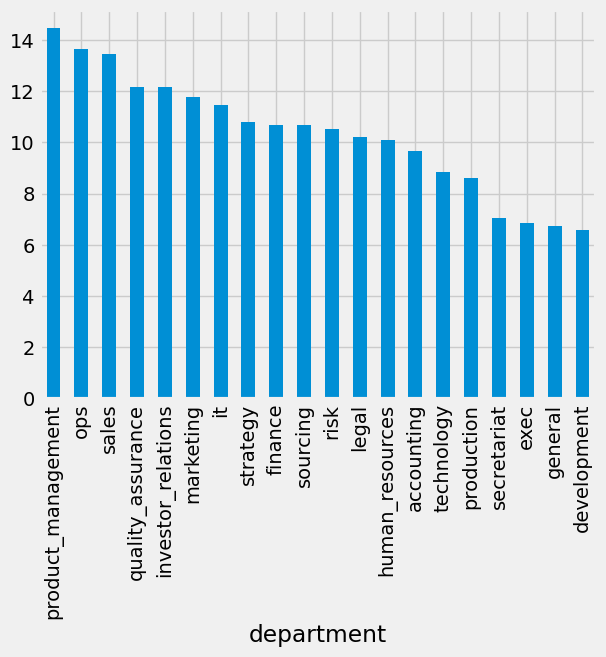

In [108]:
data.groupby('department')['spend'].mean().sort_values(ascending=False).plot(kind='bar')

In [109]:
data['at_risk_event'].value_counts()

False    102506
True       2771
Name: at_risk_event, dtype: int64

In [110]:
data['spend'].skew().round(4)

3.5918

In [111]:
data['spend'].kurt().round(4)

13.8969

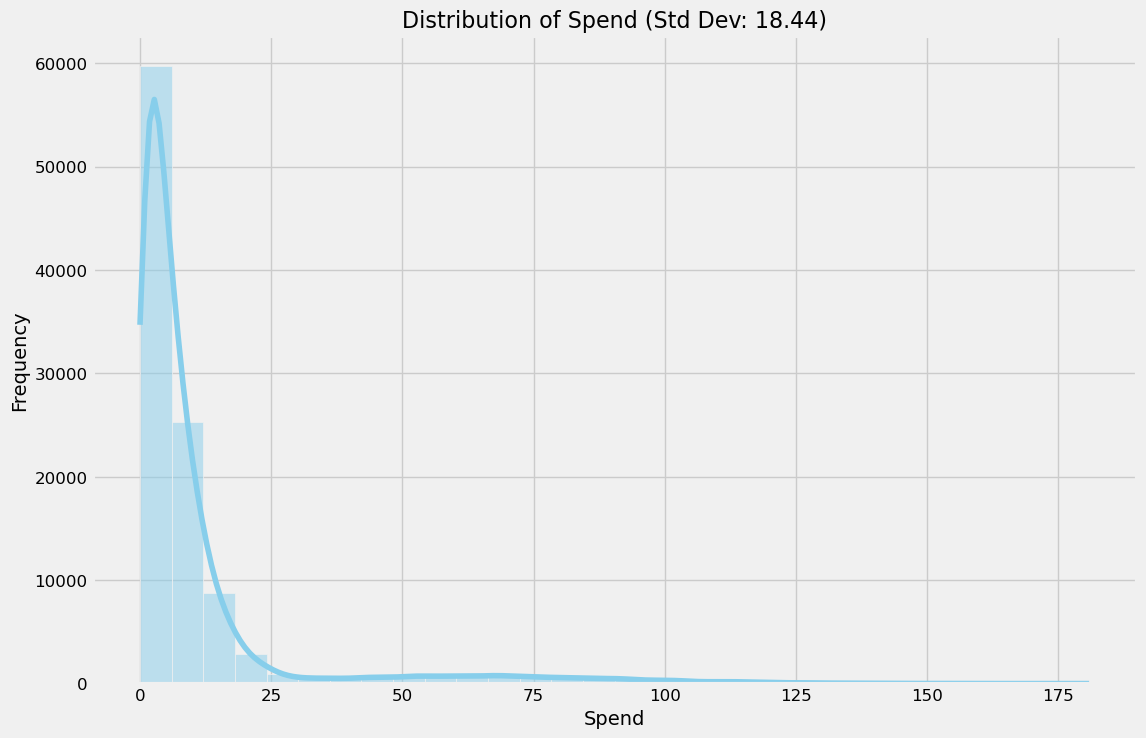

In [112]:
#Distribution of Spend
spend_std = data['spend'].std()
hour_of_day_std = data['hour_of_day'].std()
total_spend_over_time = data.groupby('date')['spend'].sum()
total_spend_over_time_std = total_spend_over_time.std()


plt.figure(figsize=(12, 8))
sns.histplot(data['spend'], bins=30, kde=True, color='skyblue')
plt.title(f'Distribution of Spend (Std Dev: {spend_std:.2f})', fontsize=16)
plt.xlabel('Spend', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

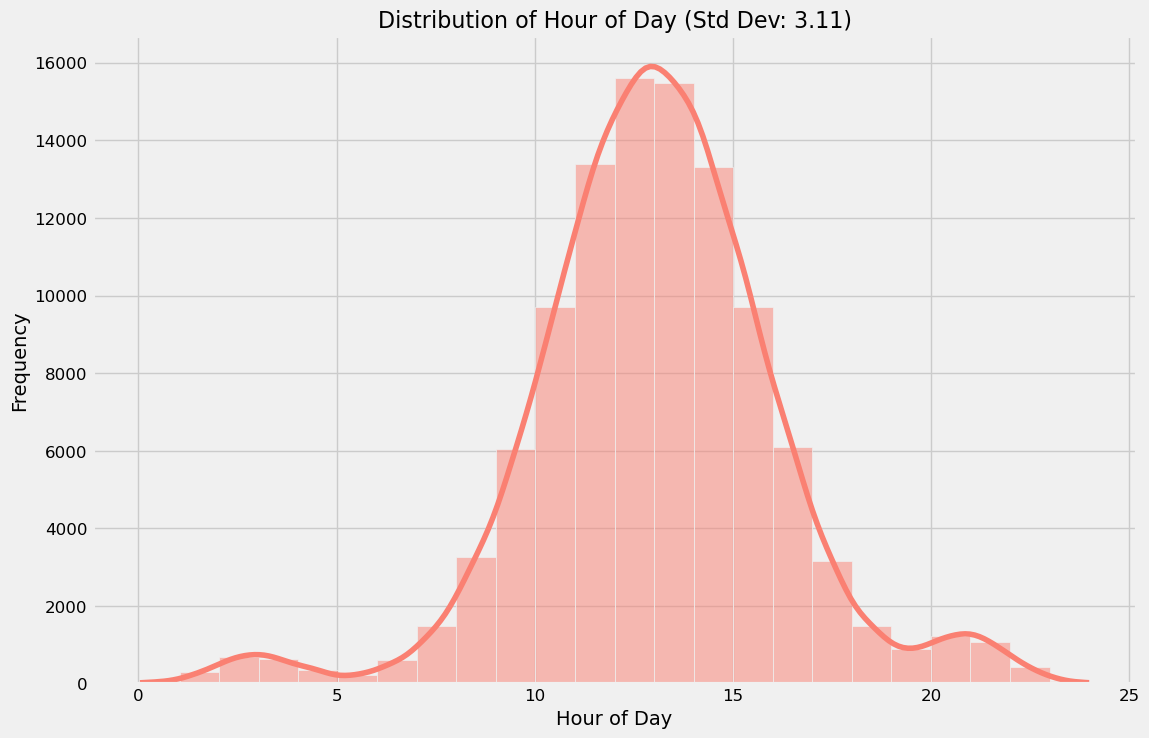

In [113]:
#Distribution of Hour of Day
plt.figure(figsize=(12, 8))
sns.histplot(data['hour_of_day'], bins=24, kde=True, color='salmon')
plt.title(f'Distribution of Hour of Day (Std Dev: {hour_of_day_std:.2f})', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

In [114]:
data['log_spend'] = np.log1p(data['spend'])

<Axes: xlabel='log_spend', ylabel='Count'>

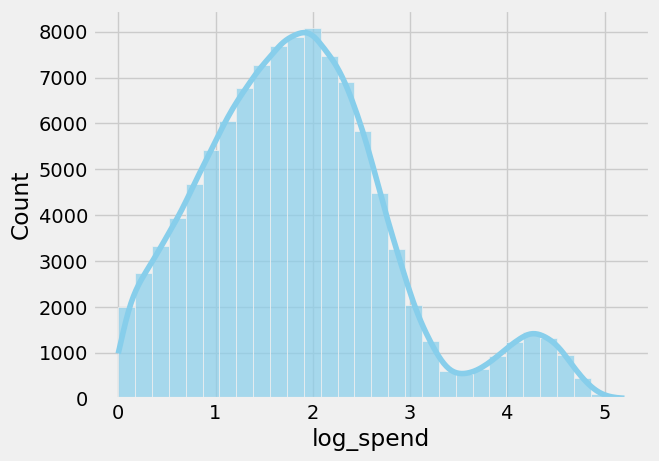

In [115]:
sns.histplot(data['log_spend'], kde=True, color="skyblue", bins=30, alpha=0.7)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Clustering of Spend')

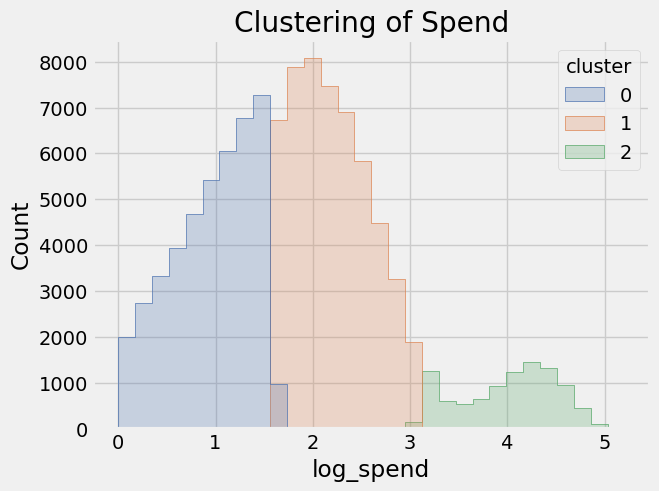

In [116]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data[['log_spend']])
data['cluster'] = kmeans.labels_

# 绘制聚类结果
sns.histplot(data, x='log_spend', hue='cluster', element='step', palette='deep', bins=30)
plt.title('Clustering of Spend')

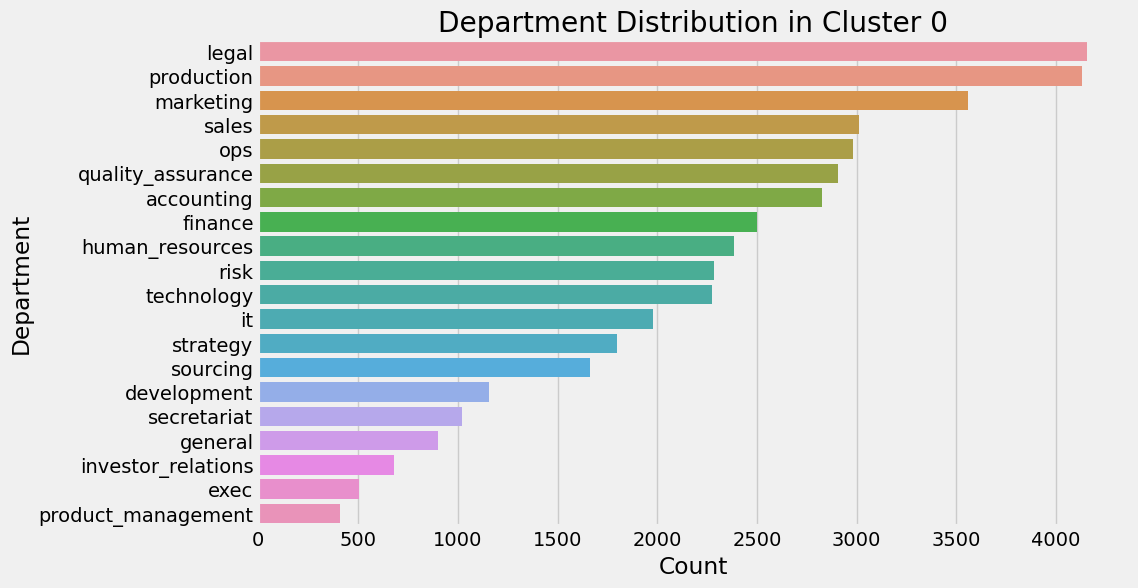

Cluster 0 Department Counts:
legal                 4155
production            4129
marketing             3557
sales                 3010
ops                   2983
quality_assurance     2908
accounting            2827
finance               2501
human_resources       2384
risk                  2287
technology            2275
it                    1981
strategy              1799
sourcing              1665
development           1155
secretariat           1022
general                902
investor_relations     679
exec                   505
product_management     408
Name: department, dtype: int64


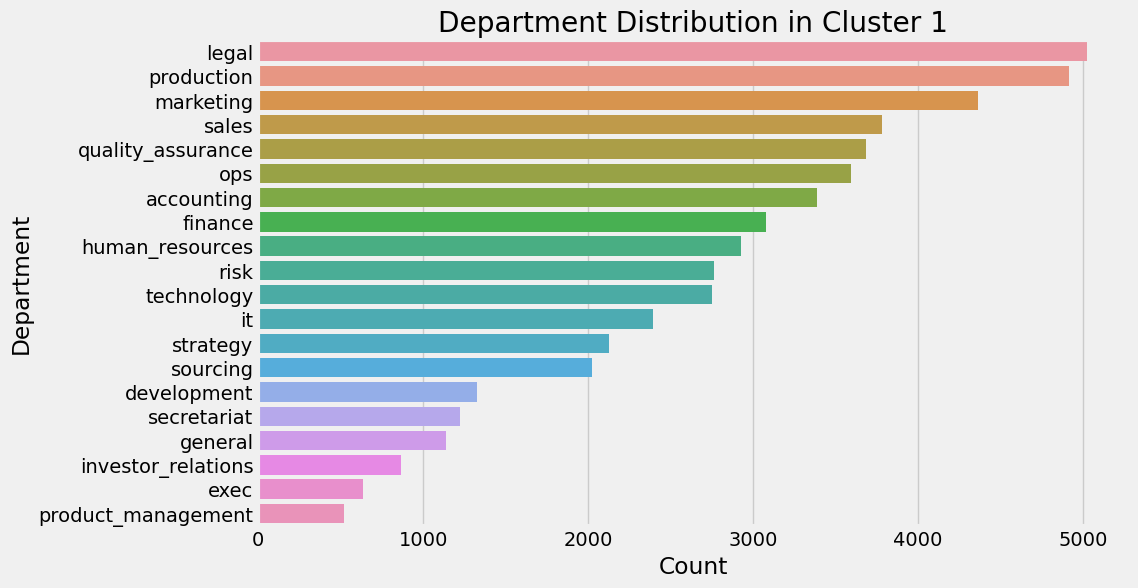

Cluster 1 Department Counts:
legal                 5024
production            4915
marketing             4365
sales                 3781
quality_assurance     3685
ops                   3595
accounting            3386
finance               3079
human_resources       2929
risk                  2760
technology            2749
it                    2392
strategy              2125
sourcing              2023
development           1326
secretariat           1225
general               1138
investor_relations     864
exec                   637
product_management     516
Name: department, dtype: int64


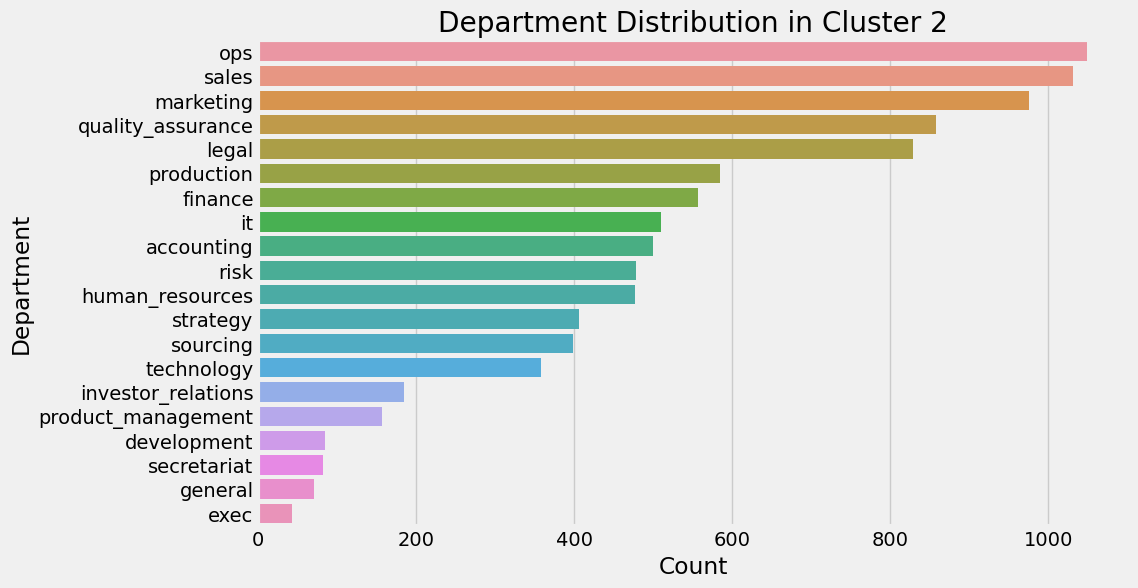

Cluster 2 Department Counts:
ops                   1049
sales                 1031
marketing              975
quality_assurance      858
legal                  829
production             585
finance                557
it                     510
accounting             500
risk                   478
human_resources        477
strategy               406
sourcing               398
technology             358
investor_relations     184
product_management     157
development             84
secretariat             82
general                 70
exec                    43
Name: department, dtype: int64


In [117]:
for i in range(3):
    plt.figure(figsize=(10, 6))
    cluster_data = data[data['cluster'] == i]
    sns.countplot(y='department', data=cluster_data, order=cluster_data['department'].value_counts().index)
    plt.title(f'Department Distribution in Cluster {i}')
    plt.xlabel('Count')
    plt.ylabel('Department')
    plt.show()

    # the specific number of departments
    print(f"Cluster {i} Department Counts:")
    print(cluster_data['department'].value_counts())

In [118]:
department_stats = data.groupby('department')['spend'].agg(['median', 'mean', 'max', 'min'])

In [119]:
department_stats

,median,mean,max,min
department,,,,
accounting,4.930,9.670101,150.42,0.00
development,4.350,6.578324,110.34,0.02
exec,4.710,6.848810,124.93,0.00
finance,5.110,10.688340,167.87,0.00
general,4.830,6.746834,94.59,0.01
human_resources,5.080,10.106195,141.92,0.00
investor_relations,5.230,12.158854,136.94,0.01
it,4.990,11.459048,138.91,0.01
legal,4.930,10.200283,167.75,0.00


Text(0, 0.5, 'Spend')

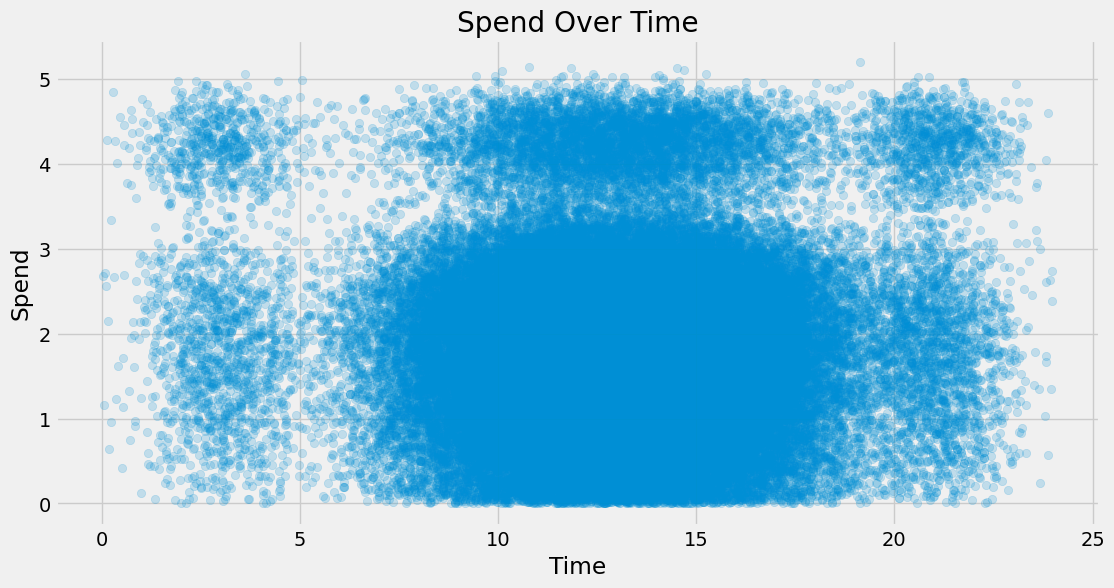

In [120]:
plt.figure(figsize=(12, 6))  
plt.scatter(data['hour_of_day'], data['log_spend'], alpha=0.2)  
plt.title('Spend Over Time') 
plt.xlabel('Time')  
plt.ylabel('Spend')  

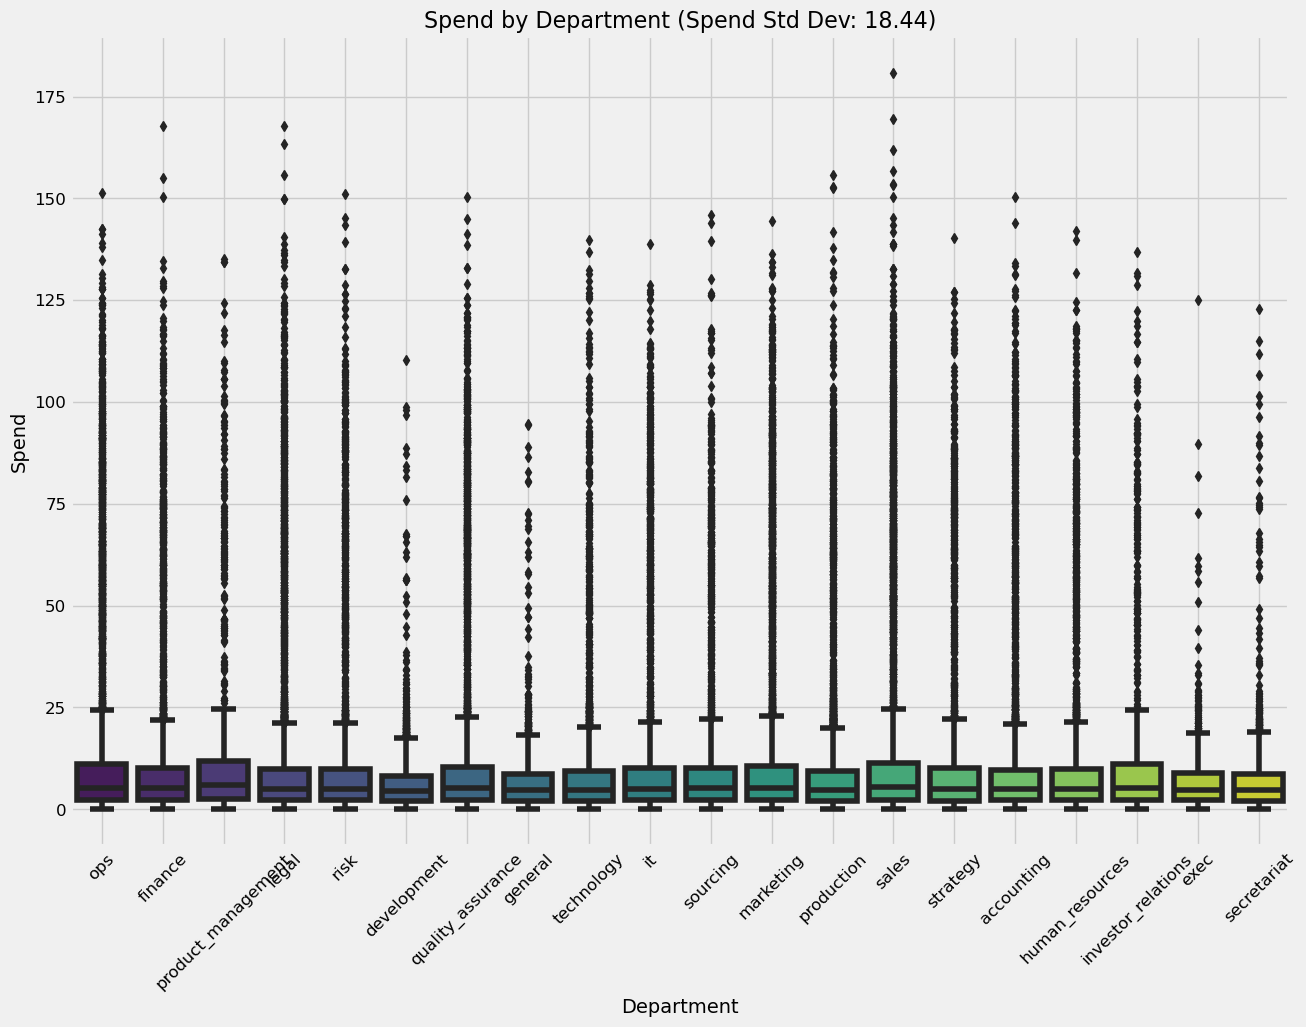

In [121]:
#Spend by Department
plt.figure(figsize=(14, 10))
sns.boxplot(x='department', y='spend', data=data, palette='viridis')
plt.title(f'Spend by Department (Spend Std Dev: {spend_std:.2f})', fontsize=16)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Spend', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

In [122]:
data['spend'] = np.log1p(data['spend'])
data = data.sort_values(by=['individual_id', 'date'])

In [123]:
data['spend'].skew().round(4)

0.6638

In [124]:
data['spend'].kurt().round(4)

0.4595

In [125]:
# Sunday
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y')
data['non_working_time'] = ((data['hour_of_day'] < 8) | (data['hour_of_day'] > 18)).astype(int)
data['is_weekend'] = (data['date'].dt.dayofweek >= 5).astype(int)
data['non_working_and_weekend'] = (data['non_working_time'] & data['is_weekend']).astype(int)
data['non_working_or_weekend'] = (data['non_working_time'] | data['is_weekend']).astype(int)

In [126]:
# first Sunday and non-working hours
first_weekend = data[data['is_weekend'] == 1].groupby('individual_id')['date'].idxmin()
data['is_first_weekend_tx'] = data.index.isin(first_weekend).astype(int)

first_non_working = data[data['non_working_time'] == 1].groupby('individual_id')['date'].idxmin()
data['is_first_non_working_tx'] = data.index.isin(first_non_working).astype(int)


In [127]:
# moving_average
data = data.sort_values(by=['individual_id', 'date'])
data['moving_average'] = data.groupby('individual_id')['spend'].rolling(window=3, min_periods=1).mean().reset_index(level=0, drop=True)
data['moving_average_diff'] = data['moving_average'].diff().fillna(0)
data['moving_std'] = data.groupby('individual_id')['spend'].rolling(window=3, min_periods=1).std().reset_index(level=0, drop=True).fillna(0)

In [128]:
# high_spend
department_stats = data.groupby('department')['spend'].agg(['mean', 'std']).reset_index()
department_stats.rename(columns={'mean': 'dept_mean_spend', 'std': 'dept_std_spend'}, inplace=True)
data = data.merge(department_stats, on='department', how='left')
data['high_spend'] = data['spend'] > (data['dept_mean_spend'] + 2 * data['dept_std_spend'])
data['high_spend'] = data['high_spend'].astype(int)

In [129]:
first_high_spend = data[data['high_spend'] == 1].groupby('individual_id')['date'].idxmin()
data['is_first_high_spend'] = data.index.isin(first_high_spend).astype(int)

In [130]:
# Standard
scaler = StandardScaler()
data[['moving_average', 'moving_std', 'moving_average_diff']] = scaler.fit_transform(
    data[['moving_average', 'moving_std', 'moving_average_diff']]
)

In [131]:
data = data.drop(columns=['Unnamed: 0'])

In [132]:
data

,individual_id,timestamp,date,day_of_week,hour_of_day,department,spend,at_risk_event,at_risk_behaviour_window,log_spend,...,non_working_or_weekend,is_first_weekend_tx,is_first_non_working_tx,moving_average,moving_average_diff,moving_std,dept_mean_spend,dept_std_spend,high_spend,is_first_high_spend
0,1,59:40.0,2023-01-09,Monday,11.994438,ops,1.131402,False,NaN,1.131402,...,0,0,0,-1.010767,-0.000016,-1.724579,1.972583,1.096185,0,0
1,1,10:02.9,2023-01-11,Wednesday,9.167461,ops,1.695616,False,NaN,1.695616,...,0,0,0,-0.618265,0.667351,-0.768913,1.972583,1.096185,0,0
2,1,51:48.7,2023-01-12,Thursday,8.863522,ops,1.597365,False,NaN,1.597365,...,0,0,0,-0.532997,0.144964,-1.002567,1.972583,1.096185,0,0
3,1,44:15.0,2023-01-12,Thursday,10.737514,ops,1.313724,False,NaN,1.313724,...,0,0,0,-0.448441,0.143754,-1.249562,1.972583,1.096185,0,0
4,1,30:58.9,2023-01-12,Thursday,13.516375,ops,0.916291,False,NaN,0.916291,...,0,0,0,-0.809872,-0.614554,-0.905071,1.972583,1.096185,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105272,2184,20:57.3,2023-04-20,Thursday,12.349245,finance,2.293544,False,NaN,2.293544,...,0,0,0,-0.747568,-0.875034,0.398207,1.861596,0.994449,0,0
105273,2184,12:27.8,2023-04-21,Friday,10.207728,finance,3.055886,False,NaN,3.055886,...,0,0,0,0.410140,1.968423,0.625967,1.861596,0.994449,0,0
105274,2184,24:52.3,2023-04-24,Monday,17.414535,finance,2.583998,False,NaN,2.583998,...,0,0,0,1.094409,1.163441,-0.802944,1.861596,0.994449,0,0
105275,2185,50:15.0,2023-02-08,Wednesday,12.837514,investor_relations,2.814210,False,NaN,2.814210,...,0,0,0,1.330565,0.401517,-1.724579,1.923708,1.044406,0,0


In [133]:
dept_data = data.groupby('department').agg(
    spend_mean=('spend', 'mean'),
    spend_std=('spend', 'std'),
    non_working_time_mean=('non_working_time', 'mean'),
    is_weekend_mean=('is_weekend', 'mean')
).reset_index()

# Standard
scaler = StandardScaler()
scaled_features = scaler.fit_transform(
    dept_data[['spend_mean', 'spend_std', 'non_working_time_mean', 'is_weekend_mean']])

# range of clusters for testing
cluster_ranges = [3, 4, 5]
silhouette_scores = []
calinski_harabasz_scores = []

# KMeans
for n_clusters in cluster_ranges:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(scaled_features)

    silhouette = silhouette_score(scaled_features, clusters)
    calinski_harabasz = calinski_harabasz_score(scaled_features, clusters)

    silhouette_scores.append(silhouette)
    calinski_harabasz_scores.append(calinski_harabasz)

evaluation_df = pd.DataFrame({
    'n_clusters': cluster_ranges,
    'Silhouette Score': silhouette_scores,
    'Calinski-Harabasz Index': calinski_harabasz_scores
})

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\A

In [134]:
evaluation_df


,n_clusters,Silhouette Score,Calinski-Harabasz Index
0,3,0.416598,17.690740
1,4,0.375374,16.556157
2,5,0.394041,17.438717


D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


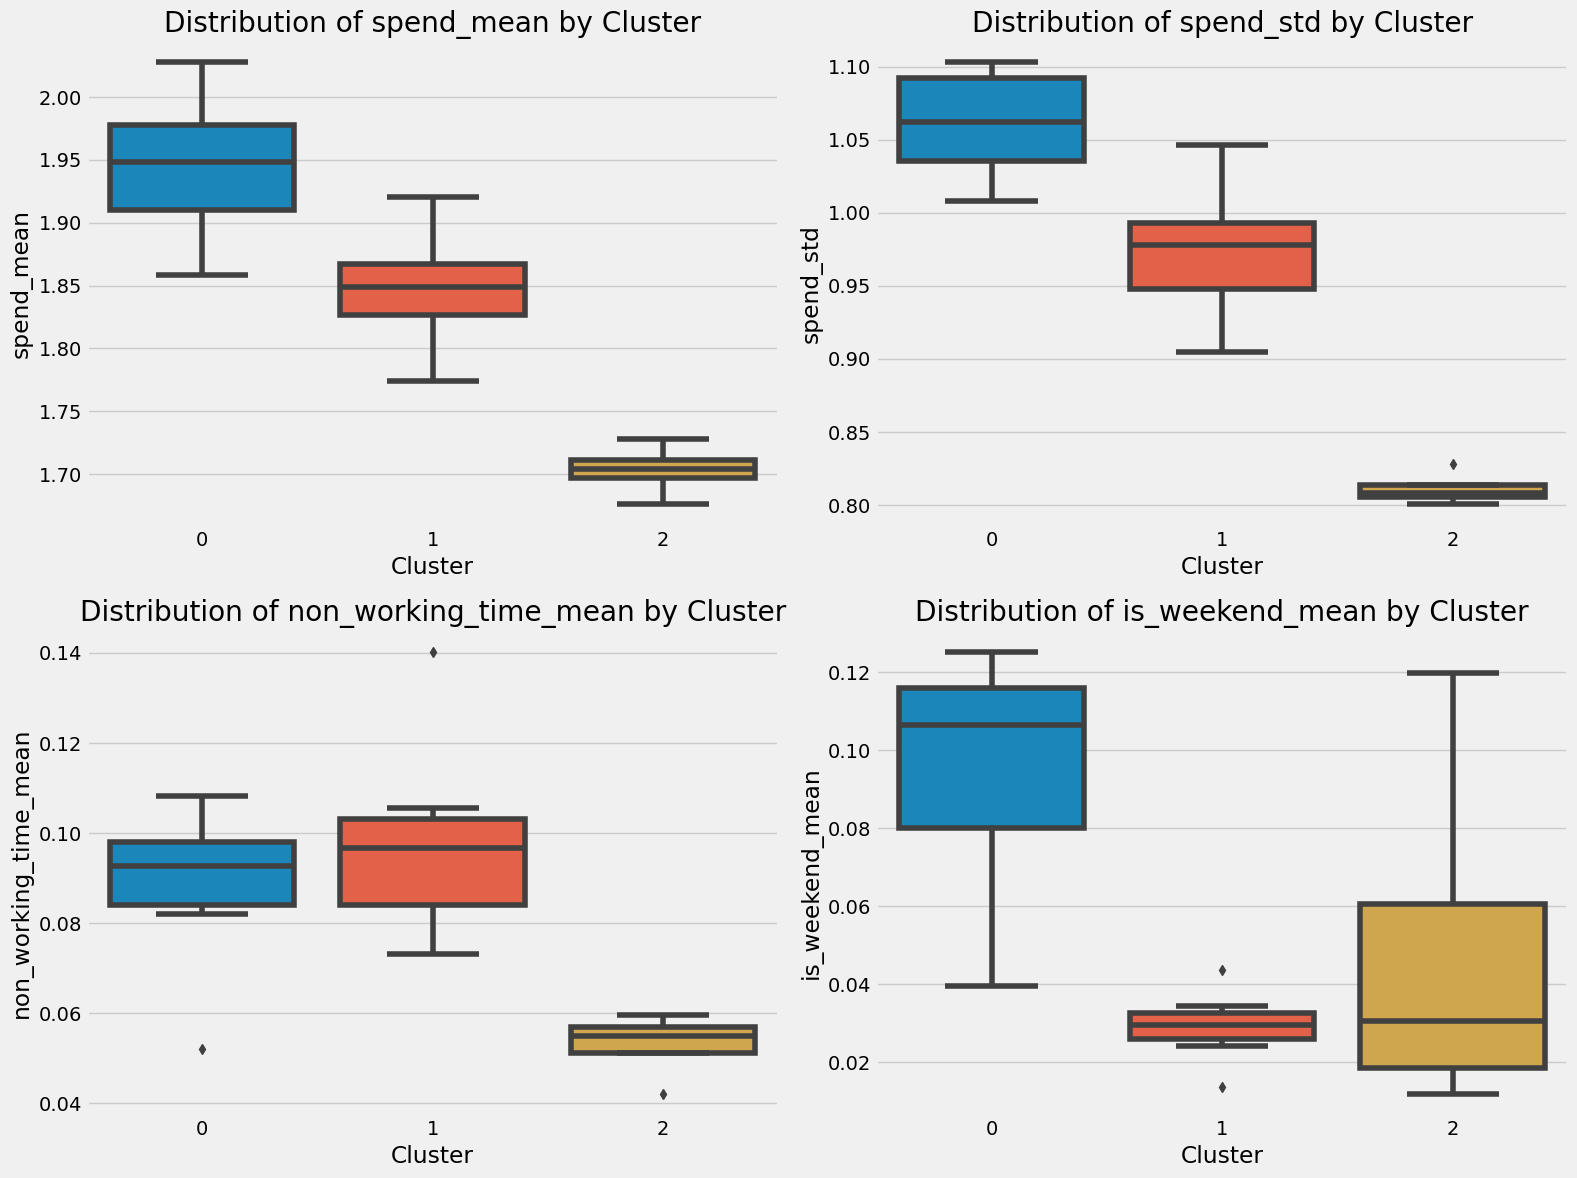

            department  spend_mean  spend_std  non_working_time_mean  \
0           accounting    1.823849   0.943164               0.075972   
1          development    1.676266   0.808775               0.054191   
2                 exec    1.728253   0.800756               0.042194   
3              finance    1.861596   0.994449               0.103797   
4              general    1.705319   0.807511               0.055924   
5      human_resources    1.849406   0.961453               0.090674   
6   investor_relations    1.923708   1.044406               0.052113   
7                   it    1.880933   1.023715               0.101167   
8                legal    1.835207   0.973390               0.081735   
9            marketing    1.905330   1.031962               0.089918   
10                 ops    1.972583   1.096185               0.095581   
11  product_management    2.027602   1.102824               0.098982   
12          production    1.773796   0.904995               0.09

In [135]:
# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
dept_data['cluster'] = kmeans.fit_predict(scaled_features)

# cluster
cluster_description = {
    0: "Cluster 0: High spend with more variability, high weekend transactions",
    1: "Cluster 1: Moderate spend, moderate variability, low weekend transactions",
    2: "Cluster 2: Low spend, low variability, low non-working time transactions"
}
dept_data['cluster_description'] = dept_data['cluster'].map(cluster_description)

features = ['spend_mean', 'spend_std', 'non_working_time_mean', 'is_weekend_mean']
plt.figure(figsize=(16, 12))
merged_data = pd.merge(data, dept_data[['department', 'cluster']], on='department', how='left')

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='cluster', y=feature, data=dept_data)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()
print(dept_data)

In [136]:
merged_data

,individual_id,timestamp,date,day_of_week,hour_of_day,department,spend,at_risk_event,at_risk_behaviour_window,log_spend,...,is_first_weekend_tx,is_first_non_working_tx,moving_average,moving_average_diff,moving_std,dept_mean_spend,dept_std_spend,high_spend,is_first_high_spend,cluster_y
0,1,59:40.0,2023-01-09,Monday,11.994438,ops,1.131402,False,NaN,1.131402,...,0,0,-1.010767,-0.000016,-1.724579,1.972583,1.096185,0,0,0
1,1,10:02.9,2023-01-11,Wednesday,9.167461,ops,1.695616,False,NaN,1.695616,...,0,0,-0.618265,0.667351,-0.768913,1.972583,1.096185,0,0,0
2,1,51:48.7,2023-01-12,Thursday,8.863522,ops,1.597365,False,NaN,1.597365,...,0,0,-0.532997,0.144964,-1.002567,1.972583,1.096185,0,0,0
3,1,44:15.0,2023-01-12,Thursday,10.737514,ops,1.313724,False,NaN,1.313724,...,0,0,-0.448441,0.143754,-1.249562,1.972583,1.096185,0,0,0
4,1,30:58.9,2023-01-12,Thursday,13.516375,ops,0.916291,False,NaN,0.916291,...,0,0,-0.809872,-0.614554,-0.905071,1.972583,1.096185,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105272,2184,20:57.3,2023-04-20,Thursday,12.349245,finance,2.293544,False,NaN,2.293544,...,0,0,-0.747568,-0.875034,0.398207,1.861596,0.994449,0,0,1
105273,2184,12:27.8,2023-04-21,Friday,10.207728,finance,3.055886,False,NaN,3.055886,...,0,0,0.410140,1.968423,0.625967,1.861596,0.994449,0,0,1
105274,2184,24:52.3,2023-04-24,Monday,17.414535,finance,2.583998,False,NaN,2.583998,...,0,0,1.094409,1.163441,-0.802944,1.861596,0.994449,0,0,1
105275,2185,50:15.0,2023-02-08,Wednesday,12.837514,investor_relations,2.814210,False,NaN,2.814210,...,0,0,1.330565,0.401517,-1.724579,1.923708,1.044406,0,0,0


In [137]:
merged_data.to_csv('merged_data.csv',index=False)